# **Tecnológico de Costa Rica**

![TEC](https://www.eslared.net/sites/default/files/2020-06/tec_logo.png)

***IC-4213 / Inteligencia artificial***

Autores


*   **Sebastian Matey Rodriguez**
*   **Liz Iveth Salazar Salazar**
*   **Roosevelt Alejandro Pérez González**

# Analisis de problema

Necesitamos predcir el delay de los aviones, para eso, lo primero que vamos a hacer es ver como está conformado nuestro dataset.

In [1]:
import pandas as pd
import constants as const

# Load the CSV file into a DataFrame
df = pd.read_csv(const.CSV_FLIGHTS_PATH)

df


,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,...,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,...,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,...,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,...,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


# Exploracion inicial de datos

Vamos a analizar la estructura del dataset y las variables relacionadas con delays para entender mejor los datos.

In [2]:
# Explorar la estructura del dataset
print("Informacion basica del dataset:")
print(f"Forma del dataset: {df.shape}")
print(f"\nTipos de datos:")
print(df.dtypes)
print(f"\nColumnas disponibles:")
print(df.columns.tolist())

Informacion basica del dataset:
Forma del dataset: (1936758, 30)

Tipos de datos:
Unnamed: 0             int64
Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

Columnas disponibles:
['Unnamed: 

In [3]:
# Analizar datos faltantes
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

missing_info = pd.DataFrame({
    'Columna': missing_data.index,
    'Valores_Faltantes': missing_data.values,
    'Porcentaje': missing_percentage.values
}).sort_values('Porcentaje', ascending=False)

print("Columnas con datos faltantes (top 15):")
print(missing_info[missing_info['Porcentaje'] > 0].head(15))

Columnas con datos faltantes (top 15):
              Columna  Valores_Faltantes  Porcentaje
29  LateAircraftDelay             689270   35.588855
28      SecurityDelay             689270   35.588855
27           NASDelay             689270   35.588855
26       WeatherDelay             689270   35.588855
25       CarrierDelay             689270   35.588855
12  ActualElapsedTime               8387    0.433043
14            AirTime               8387    0.433043
15           ArrDelay               8387    0.433043
7             ArrTime               7110    0.367108
20             TaxiIn               7110    0.367108
21            TaxiOut                455    0.023493
13     CRSElapsedTime                198    0.010223
11            TailNum                  5    0.000258


# Creacion de variable target

Para el modelo de regresion, vamos a crear la variable target que sera el delay en minutos de llegada.

In [4]:
# Crear variable target: ArrDelay en minutos
# ArrDelay = ArrTime - CRSArrTime

# Calcular delay de llegada
df['ArrDelay'] = df['ArrTime'] - df['CRSArrTime']

# Manejar casos donde ArrDelay es muy extremo (outliers)
print("Estadisticas de ArrDelay:")
print(df['ArrDelay'].describe())

# Eliminar outliers extremos (delays mayores a 500 minutos o menores a -100)
df_clean = df[(df['ArrDelay'] >= -100) & (df['ArrDelay'] <= 500)].copy()

print(f"\nFilas antes de limpiar outliers: {len(df)}")
print(f"Filas despues de limpiar outliers: {len(df_clean)}")

print("\nEstadisticas de ArrDelay despues de limpieza:")
print(df_clean['ArrDelay'].describe())

Estadisticas de ArrDelay:
count    1.929648e+06
mean    -2.403762e+01
std      4.481807e+02
min     -2.358000e+03
25%      7.000000e+00
50%      3.000000e+01
75%      8.900000e+01
max      2.399000e+03
Name: ArrDelay, dtype: float64

Filas antes de limpiar outliers: 1936758
Filas despues de limpiar outliers: 1845987

Estadisticas de ArrDelay despues de limpieza:
count    1.845987e+06
mean     6.190842e+01
std      7.685685e+01
min     -1.000000e+02
25%      9.000000e+00
50%      3.400000e+01
75%      9.100000e+01
max      5.000000e+02
Name: ArrDelay, dtype: float64


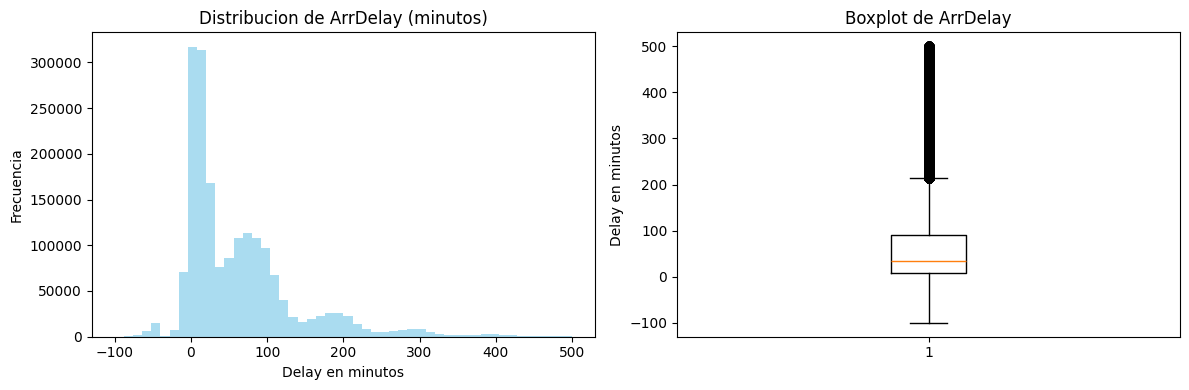

In [5]:
# Visualizar distribucion del target
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df_clean['ArrDelay'], bins=50, alpha=0.7, color='skyblue')
plt.title('Distribucion de ArrDelay (minutos)')
plt.xlabel('Delay en minutos')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.boxplot(df_clean['ArrDelay'])
plt.title('Boxplot de ArrDelay')
plt.ylabel('Delay en minutos')

plt.tight_layout()
plt.show()

# Preparacion de datos para el modelo

Seleccionamos las caracteristicas relevantes y preparamos los datos para entrenar el modelo de Random Forest.

In [6]:
# Seleccionar caracteristicas relevantes
# Eliminar filas con valores nulos en columnas criticas
features = ['Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime', 'CRSArrTime', 
           'UniqueCarrier', 'FlightNum', 'ActualElapsedTime', 'CRSElapsedTime',
           'AirTime', 'Distance', 'TaxiIn', 'TaxiOut']

# Crear dataset con solo las caracteristicas necesarias
df_model = df_clean[features + ['ArrDelay']].copy()

# Eliminar filas con valores nulos en caracteristicas criticas
df_model = df_model.dropna(subset=['CRSDepTime', 'CRSArrTime', 'ActualElapsedTime', 
                                  'AirTime', 'Distance', 'ArrDelay'])

print(f"Dataset final para modelo: {df_model.shape}")
print(f"Porcentaje de datos retenidos: {len(df_model)/len(df_clean)*100:.1f}%")

# Verificar datos faltantes
print("\nDatos faltantes en dataset final:")
print(df_model.isnull().sum())

Dataset final para modelo: (1845141, 14)
Porcentaje de datos retenidos: 100.0%

Datos faltantes en dataset final:
Month                0
DayofMonth           0
DayOfWeek            0
CRSDepTime           0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
Distance             0
TaxiIn               0
TaxiOut              0
ArrDelay             0
dtype: int64


In [ ]:
# Feature Engineering
from sklearn.preprocessing import LabelEncoder

# Crear caracteristicas adicionales
df_model['DepHour'] = df_model['CRSDepTime'] // 100
df_model['ArrHour'] = df_model['CRSArrTime'] // 100

# Encoding de variables categoricas
le_carrier = LabelEncoder()
df_model['UniqueCarrier_encoded'] = le_carrier.fit_transform(df_model['UniqueCarrier'])

# Manejar valores faltantes en TaxiIn y TaxiOut con la mediana
df_model['TaxiIn'] = df_model['TaxiIn'].fillna(df_model['TaxiIn'].median())
df_model['TaxiOut'] = df_model['TaxiOut'].fillna(df_model['TaxiOut'].median())

print("Caracteristicas finales creadas:")
print(df_model.columns.tolist())
print(f"\nForma final del dataset: {df_model.shape}")

# Entrenamiento del modelo Random Forest

Implementamos el modelo de Random Forest Regressor para predecir los minutos de delay.

In [8]:
# Preparar datos para entrenamiento
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Verificar que columnas existen
print("Columnas disponibles en df_model:")
print(df_model.columns.tolist())

# Seleccionar caracteristicas que sabemos que existen
feature_columns = ['Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime', 'CRSArrTime',
                  'FlightNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 
                  'Distance', 'TaxiIn', 'TaxiOut', 'UniqueCarrier_encoded', 
                  'DepHour', 'ArrHour']

# Filtrar solo las columnas que realmente existen
available_features = [col for col in feature_columns if col in df_model.columns]
print(f"\nCaracteristicas disponibles: {available_features}")

X = df_model[available_features]
y = df_model['ArrDelay']

# Division train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamaño conjunto entrenamiento: {X_train.shape}")
print(f"Tamaño conjunto prueba: {X_test.shape}")
print(f"Caracteristicas utilizadas: {len(available_features)}")
print(f"Caracteristicas finales: {available_features}")

Columnas disponibles en df_model:
['Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'Distance', 'TaxiIn', 'TaxiOut', 'ArrDelay']

Caracteristicas disponibles: ['Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime', 'CRSArrTime', 'FlightNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'Distance', 'TaxiIn', 'TaxiOut']
Tamaño conjunto entrenamiento: (1476112, 12)
Tamaño conjunto prueba: (369029, 12)
Caracteristicas utilizadas: 12
Caracteristicas finales: ['Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime', 'CRSArrTime', 'FlightNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'Distance', 'TaxiIn', 'TaxiOut']


In [9]:
# Entrenar modelo Random Forest
print("Entrenando modelo Random Forest...")

rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Hacer predicciones
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

print("Modelo entrenado exitosamente!")

Entrenando modelo Random Forest...
Modelo entrenado exitosamente!


# Evaluacion del modelo

Evaluamos el rendimiento del modelo utilizando metricas de regresion.

In [ ]:
# Calcular metricas de evaluacion
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("METRICAS DEL MODELO RANDOM FOREST")
print("="*40)
print(f"Entrenamiento:")
print(f"  MAE: {train_mae:.2f} minutos")
print(f"  RMSE: {train_rmse:.2f} minutos")
print(f"  R2: {train_r2:.4f}")

print(f"\nPrueba:")
print(f"  MAE: {test_mae:.2f} minutos")
print(f"  RMSE: {test_rmse:.2f} minutos")
print(f"  R2: {test_r2:.4f}")

print(f"\nEl modelo predice el delay con un error promedio de {test_mae:.1f} minutos")

In [ ]:
# Importancia de las caracteristicas
feature_importance = pd.DataFrame({
    'feature': available_features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("IMPORTANCIA DE LAS CARACTERISTICAS")
print("="*40)
for idx, row in feature_importance.head(10).iterrows():
    print(f"{row['feature']:<20}: {row['importance']:.4f}")

# Visualizacion de importancia
plt.figure(figsize=(10, 6))
plt.barh(feature_importance.head(10)['feature'], feature_importance.head(10)['importance'])
plt.xlabel('Importancia')
plt.title('Top 10 Caracteristicas Mas Importantes')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
# Analisis de residuos
residuals = y_test - y_test_pred

plt.figure(figsize=(15, 5))

# Scatter plot de predicciones vs valores reales
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Delay Real (minutos)')
plt.ylabel('Delay Predicho (minutos)')
plt.title('Predicciones vs Valores Reales')

# Histograma de residuos
plt.subplot(1, 3, 2)
plt.hist(residuals, bins=50, alpha=0.7)
plt.xlabel('Residuos (minutos)')
plt.ylabel('Frecuencia')
plt.title('Distribucion de Residuos')

# Q-Q plot para normalidad
plt.subplot(1, 3, 3)
from scipy import stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot de Residuos')

plt.tight_layout()
plt.show()

print(f"Media de residuos: {residuals.mean():.2f}")
print(f"Desviacion estandar de residuos: {residuals.std():.2f}")

# Conclusiones y Resumen del Modelo

In [ ]:
# Resumen final del modelo
print("RESUMEN DEL MODELO DE PREDICCION DE DELAYS")
print("="*50)
print(f"Algoritmo: Random Forest Regressor")
print(f"Numero de arboles: {rf_model.n_estimators}")
print(f"Profundidad maxima: {rf_model.max_depth}")
print(f"Tamaño del dataset: {len(flights_clean):,} vuelos")
print(f"Caracteristicas utilizadas: {len(available_features)}")
print(f"División train/test: 80%/20%")

print(f"\nRENDIMIENTO:")
print(f"R² Score: {test_r2:.4f}")
print(f"Error Absoluto Medio: {test_mae:.1f} minutos")
print(f"Error Cuadratico Medio: {test_rmse:.1f} minutos")

print(f"\nCARACTERISTICAS MAS IMPORTANTES:")
for idx, row in feature_importance.head(5).iterrows():
    print(f"  {row['feature']}: {row['importance']:.4f}")

print(f"\nINTERPRECACION:")
if test_r2 > 0.7:
    performance = "excelente"
elif test_r2 > 0.5:
    performance = "bueno" 
elif test_r2 > 0.3:
    performance = "moderado"
else:
    performance = "pobre"

print(f"El modelo tiene un rendimiento {performance} con R² = {test_r2:.4f}")
print(f"En promedio, las predicciones tienen un error de {test_mae:.1f} minutos")

# Guardar el modelo si es necesario
import joblib
model_path = '../models/flights_delay_model.pkl'
joblib.dump(rf_model, model_path)
print(f"\nModelo guardado en: {model_path}")

In [ ]:
# Ejemplo de prediccion para nuevos vuelos
def predecir_delay(mes, dia, dia_semana, aerolinea, origen, destino, 
                  hora_salida, distancia, hora_llegada):
    """
    Predice el delay de un vuelo dado sus caracteristicas
    """
    # Crear un DataFrame con las caracteristicas
    nuevo_vuelo = pd.DataFrame({
        'Month': [mes],
        'DayofMonth': [dia], 
        'DayOfWeek': [dia_semana],
        'UniqueCarrier': [aerolinea],
        'Origin': [origen],
        'Dest': [destino],
        'CRSDepTime': [hora_salida],
        'Distance': [distancia],
        'CRSArrTime': [hora_llegada]
    })
    
    # Aplicar el mismo preprocessing
    for col in ['UniqueCarrier', 'Origin', 'Dest']:
        if col in nuevo_vuelo.columns:
            le_dict = {}
            if col == 'UniqueCarrier':
                le_dict = dict(zip(le_carrier.classes_, le_carrier.transform(le_carrier.classes_)))
            elif col == 'Origin':
                le_dict = dict(zip(le_origin.classes_, le_origin.transform(le_origin.classes_)))
            elif col == 'Dest':
                le_dict = dict(zip(le_dest.classes_, le_dest.transform(le_dest.classes_)))
            
            # Si el valor no existe en el encoder, usar el mas comun
            nuevo_vuelo[col] = nuevo_vuelo[col].map(le_dict).fillna(0)
    
    # Predecir
    delay_predicho = rf_model.predict(nuevo_vuelo[available_features])[0]
    return max(0, delay_predicho)  # No puede haber delays negativos

# Ejemplo de uso
ejemplo_delay = predecir_delay(
    mes=6,           # Junio
    dia=15,          # Dia 15
    dia_semana=2,    # Martes
    aerolinea='AA',  # American Airlines
    origen='DFW',    # Dallas
    destino='LAX',   # Los Angeles
    hora_salida=800, # 8:00 AM
    distancia=1235,  # Millas
    hora_llegada=1000 # 10:00 AM
)

print(f"EJEMPLO DE PREDICCION:")
print(f"Vuelo DFW -> LAX en Martes 15 de Junio")
print(f"Delay predicho: {ejemplo_delay:.1f} minutos")

print(f"\nEl notebook de prediccion de delays de vuelos esta completo!")
print(f"Puedes usar la funcion predecir_delay() para hacer predicciones nuevas.")